Importing Libraries

In [1]:
#Data Processing Libs
import numpy as np
import pandas as pd

#Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

#Removing warnings
import warnings
warnings.filterwarnings('ignore')

Creating the dataframe

In [2]:
churn = pd.read_csv('churn_data.csv')

In [3]:
net = pd.read_csv('internet_data.csv')

In [4]:
cust = pd.read_csv('customer_data.csv')

In [145]:
df = pd.merge(churn, net, how='inner', on='customerID')

In [146]:
df = pd.merge(df, cust, how='inner', on='customerID')

Data Cleaning

In [147]:
df.shape

(7042, 21)

In [148]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No


In [149]:
df.tail()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Female,0,No,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Yes,...,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No phone service,...,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Yes,...,No,No,No,No,No,No,Male,1,Yes,No


In [150]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   MultipleLines     7042 non-null   object 
 10  InternetService   7042 non-null   object 
 11  OnlineSecurity    7042 non-null   object 
 12  OnlineBackup      7042 non-null   object 
 13  DeviceProtection  7042 non-null   object 
 14  TechSupport       7042 non-null   object 
 15  StreamingTV       7042 non-null   object 
 16  StreamingMovies   7042 non-null   object 


In [153]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [132]:
df['TotalCharges'].describe()

count     7042
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [133]:
def elimWhiteSpace(df):
    for var in df.columns:
        df[var].replace(' ', np.nan, inplace=True)

In [154]:
elimWhiteSpace(df)
df.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
dtype: int64

We can see that there are now null values revealed in TotalCharges

In [75]:
#Removing null vals requires us to understand the data distribution to make an educated choice as to what to fill it with.
df['TotalCharges'].describe()

count     7031
unique    6529
top       20.2
freq        11
Name: TotalCharges, dtype: object

We cannot make plots or find mean of this data column due to existence of nulls. Thus we must convert to numeric

In [155]:
#Converting all vals to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [156]:
df['TotalCharges'].describe()

count    7031.000000
mean     2282.651714
std      2266.279660
min        18.800000
25%       401.400000
50%      1397.300000
75%      3793.050000
max      8684.800000
Name: TotalCharges, dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

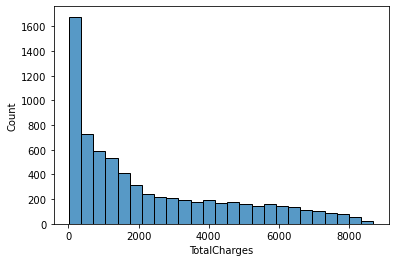

In [157]:
sns.histplot(data=df, x='TotalCharges')

We see that the distribution is heavily skewed, thus we will take the median imputed with another data column related to total charges, the monthly charges

In [139]:
#Checking the difference between taking median alone vs with monthly charges
(df['TotalCharges']/df['MonthlyCharges']).median()*df['MonthlyCharges'] - df['TotalCharges'].median()

0       -536.847761
1        244.333333
2        154.973134
3       -177.965672
4        640.689055
           ...     
7037    -787.632836
7038    1047.133831
7039    1577.529851
7040    -544.054229
7041     747.344776
Name: MonthlyCharges, Length: 7042, dtype: float64

The difference can get very large up to 1000. In this case we will prefer the more accurate multiple imputation

In [158]:
val = (df['TotalCharges']/df['MonthlyCharges']).median()*df['MonthlyCharges']

In [159]:
df['TotalCharges'].fillna(val,inplace=True)

In [160]:
df['TotalCharges'].describe()

count    7042.000000
mean     2280.951046
std      2265.064854
min        18.800000
25%       402.087500
50%      1397.100000
75%      3783.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [161]:
df['TotalCharges'].isnull().sum()

0

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

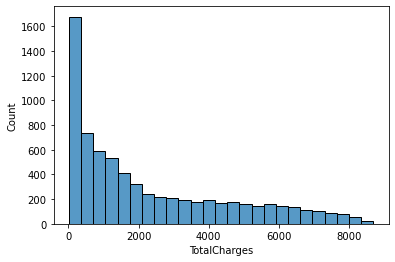

In [162]:
sns.histplot(data=df, x='TotalCharges')

We have filled all nan values

In [163]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,2280.951046,0.162170
std,24.557955,30.088238,2265.064854,0.368633
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.087500,0.000000
50%,29.000000,70.350000,1397.100000,0.000000
75%,55.000000,89.850000,3783.600000,0.000000
max,72.000000,118.750000,8684.800000,1.000000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   float64
 8   Churn             7042 non-null   object 
 9   MultipleLines     7042 non-null   object 
 10  InternetService   7042 non-null   object 
 11  OnlineSecurity    7042 non-null   object 
 12  OnlineBackup      7042 non-null   object 
 13  DeviceProtection  7042 non-null   object 
 14  TechSupport       7042 non-null   object 
 15  StreamingTV       7042 non-null   object 
 16  StreamingMovies   7042 non-null   object 


<AxesSubplot:>

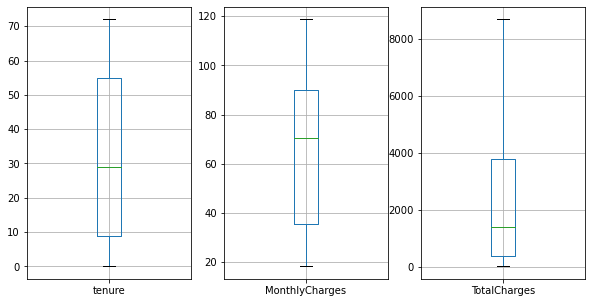

In [167]:
#Checking for outliers:
plt.figure(figsize = (10, 5))

plt.subplot(1,3,1)
df.boxplot(column = 'tenure')

plt.subplot(1,3,2)
df.boxplot(column = 'MonthlyCharges')

plt.subplot(1,3,3)
df.boxplot(column = 'TotalCharges')

As we see, no outliers

In [178]:
#Let us separate categorical variables.
df_cat = [var for var in df.columns if var not in ['tenure', 'MonthlyCharges', 'TotalCharges']]

#Now separating variables returning either yes or no:
df_yn = []
for var in df.columns:
    if pd.array(['No', 'Yes']).equals(pd.array(sorted(df[var].unique()))):
        df_yn.append(var)

In [180]:
df_yn

['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

In [183]:
pie_PhoneService_Yes = pd.DataFrame(df[df['PhoneService'] == "Yes"]['Churn'].value_counts())

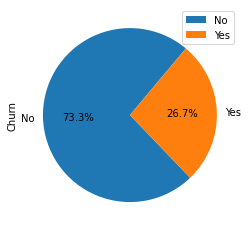

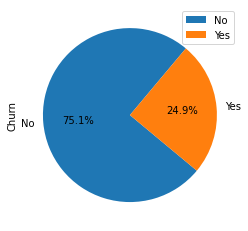

In [198]:
pie_PhoneService_Yes = pd.DataFrame(df[df['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
# plt.set_title(label = 'Had phone service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(df[df['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
# plt.set_title(label = 'No phone service')
plt.gca().set_aspect('equal')

plt.show() 

As we can see, phone service seems to be irrelevant to whether a customer churns.

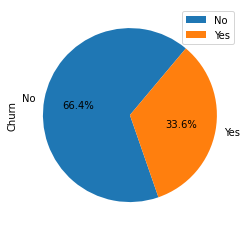

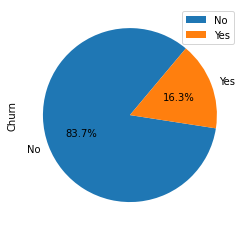

In [199]:
pie_PaperlessBilling_Yes = pd.DataFrame(df[df['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
# plt.set_title(label = 'Had phone service')
plt.gca().set_aspect('equal')

pie_PaperlessBilling_No = pd.DataFrame(df[df['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
# plt.set_title(label = 'No phone service')
plt.gca().set_aspect('equal')

plt.show() 

People with Paperless billing churn more than people who don't opt for it

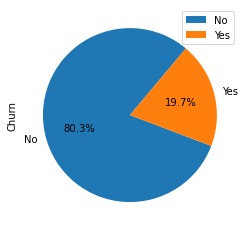

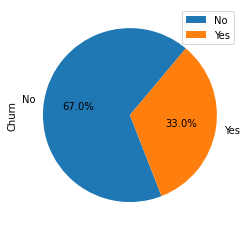

In [200]:
pie_Partner_Yes = pd.DataFrame(df[df['Partner'] == "Yes"]['Churn'].value_counts())
pie_Partner_Yes.plot.pie(subplots=True, labels = pie_Partner_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
# plt.set_title(label = 'Had phone service')
plt.gca().set_aspect('equal')

pie_Partner_No = pd.DataFrame(df[df['Partner'] == "No"]['Churn'].value_counts())
pie_Partner_No.plot.pie(subplots=True, labels = pie_Partner_Yes.index.values, autopct='%1.1f%%', startangle= 50)
# plt.set_title(label = 'No phone service')
plt.gca().set_aspect('equal')

plt.show() 

People without partners churn more

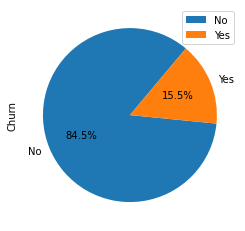

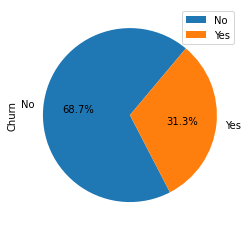

In [201]:
pie_Dependents_Yes = pd.DataFrame(df[df['Dependents'] == "Yes"]['Churn'].value_counts())
pie_Dependents_Yes.plot.pie(subplots=True, labels = pie_Dependents_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
# plt.set_title(label = 'Had phone service')
plt.gca().set_aspect('equal')

pie_Dependents_No = pd.DataFrame(df[df['Dependents'] == "No"]['Churn'].value_counts())
pie_Dependents_No.plot.pie(subplots=True, labels = pie_Dependents_Yes.index.values, autopct='%1.1f%%', startangle= 50)
# plt.set_title(label = 'No phone service')
plt.gca().set_aspect('equal')

plt.show() 

People without dependents churn more

In [202]:
#Creating the Binary Mapping func
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [204]:
#Converting the yes/no vars to 0 and 1
df[df_yn] = df[df_yn].apply(binary_map)

In [207]:
#dummy encoding the other categorical variables:
df_cat = [x for x in df_cat if x not in df_yn]

In [208]:
len(df_cat) + len(df_yn)

18

In [ ]:
#Dropping customerID as it is meaningless
df1 = df.drop('customerID', axis=1, inplace=True)

In [211]:
df_cat.pop(0)

'customerID'

In [220]:
df.shape

(7042, 20)

In [229]:
df_cat

['Contract',
 'PaymentMethod',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'gender',
 'SeniorCitizen']

In [230]:
#Finally creating dummy var dataframe
df_dummies = pd.get_dummies(df, drop_first=True)

In [231]:
df_dummies.shape

(7042, 31)

In [232]:
df_dummies.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male
0,1,0,1,29.85,29.85,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,2,1,1,53.85,108.15,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,2,1,1,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We see that we can make it more convenient to access data by replacing which dummy column is dropped

In [255]:
#First creating dummies for all short cat variables
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

#Now creating specific dummy columns for the variables which can be shortened
dummy2 = pd.get_dummies(df['DeviceProtection'], prefix = 'DeviceProtection')
dummy2.drop(columns = 'DeviceProtection_No internet service', inplace=True)

dummy3 = pd.get_dummies(df['TechSupport'], prefix = 'TechSupport')
dummy3.drop(columns = 'TechSupport_No internet service', inplace=True)

dummy4 = pd.get_dummies(df['StreamingTV'], prefix = 'StreamingTV')
dummy4.drop(columns = 'StreamingTV_No internet service', inplace=True)

dummy5 = pd.get_dummies(df['StreamingMovies'], prefix = 'StreamingMovies')
dummy5.drop(columns = 'StreamingMovies_No internet service', inplace=True)

In [274]:
dummy6 = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
dummy6.drop(['MultipleLines_No phone service'], 1, inplace=True)

In [281]:
dummy7 = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
dummy7.drop(['OnlineSecurity_No internet service'], 1, inplace=True)

dummy8 = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
dummy8.drop(columns = 'OnlineBackup_No internet service', inplace=True)

,OnlineBackup_No,OnlineBackup_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
7037,0,0
7038,1,0
7039,0,1
7040,1,0


In [262]:
df1 = pd.concat([df, dummy1], axis=1)

In [264]:
df1 = pd.concat([df1, dummy2], axis=1)

In [266]:
df1 = pd.concat([df1, dummy3], axis=1)

In [267]:
df1 = pd.concat([df1, dummy4], axis=1)

In [268]:
df1 = pd.concat([df1, dummy5], axis=1)

In [276]:
df1 = pd.concat([df1, dummy6], axis=1)

In [282]:
df1 = pd.concat([df1, dummy7], axis=1)

In [283]:
df1 = pd.concat([df1, dummy8], axis=1)

In [269]:
df1.shape

(7042, 36)

In [270]:
df1.drop(columns = ['Contract', 'PaymentMethod', 'gender', 'InternetService', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], inplace=True)

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7037                  No
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
Name: MultipleLines, Length: 7042, dtype: object

In [277]:
df1.drop('MultipleLines', axis=1, inplace=True)

In [284]:
df1.drop(['OnlineSecurity', 'OnlineBackup'], axis=1, inplace=True)

In [285]:
df1.shape

(7042, 31)

In [288]:
df1.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes'],
      dtype='object')

In [290]:
df1.isnull().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
DeviceProtection_No                      0
DeviceProtection_Yes                     0
TechSupport_No                           0
TechSupport_Yes                          0
StreamingTV_No                           0
StreamingTV_Yes                          0
StreamingMo

# MOVING ON TO TRAIN TEST SPLIT AND MODEL BUILDING

In [332]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df1, train_size=0.7 ,test_size = 0.3, random_state=42)

In [333]:
df_train.shape

(4929, 31)

In [334]:
df_test.shape

(2113, 31)

In [440]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df_train[['tenure','MonthlyCharges','TotalCharges']])
df_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df_test[['tenure','MonthlyCharges','TotalCharges']])

In [336]:
df_train[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
1095,-1.288801,0.526975,-0.972854
6928,0.622508,-0.288272,0.153478
3664,-1.166802,-0.452968,-0.919509
2900,-1.288801,0.154761,-0.977805
1630,0.215847,1.253286,0.748487
...,...,...,...
3772,-1.288801,1.002948,-0.966523
5191,-0.394146,0.874485,-0.044960
5226,-0.841473,-1.429618,-0.874051
5390,-0.841473,1.149528,-0.482300


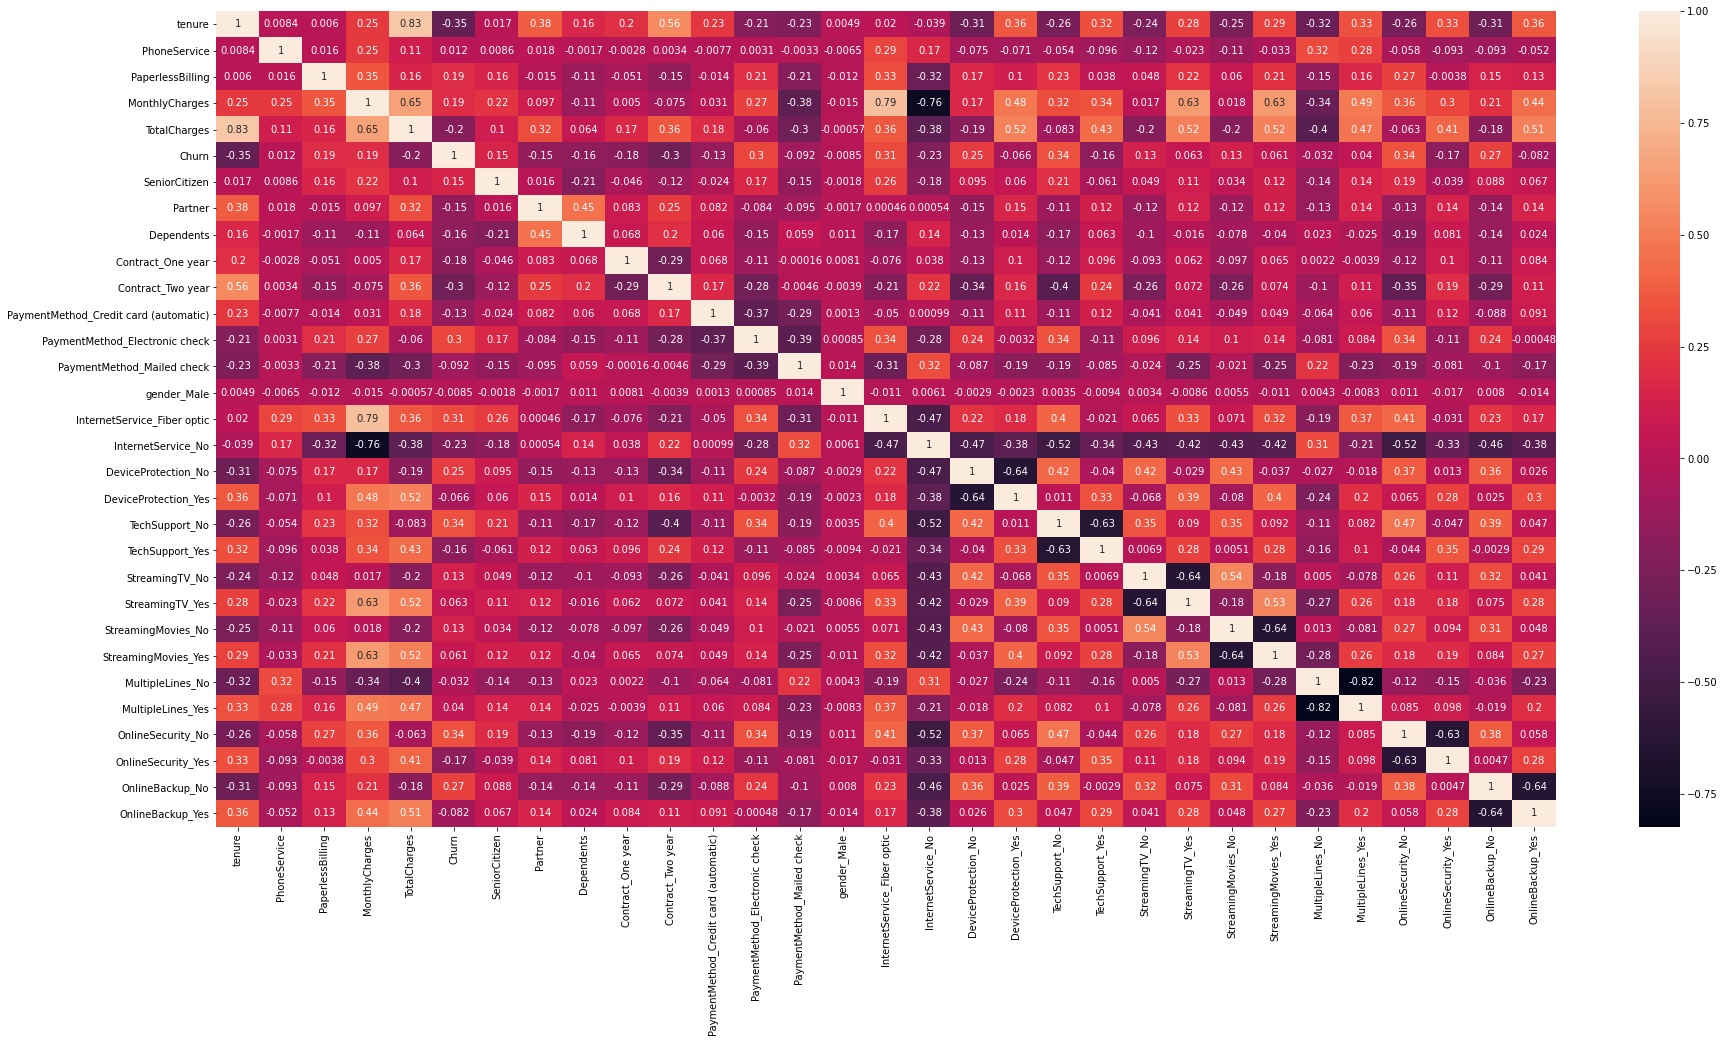

In [337]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df1.corr(),annot = True)
plt.show()

In [338]:
#Dropping inter-correlated predictor variables
df_test = df_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], 1)
df_train = df_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], 1)

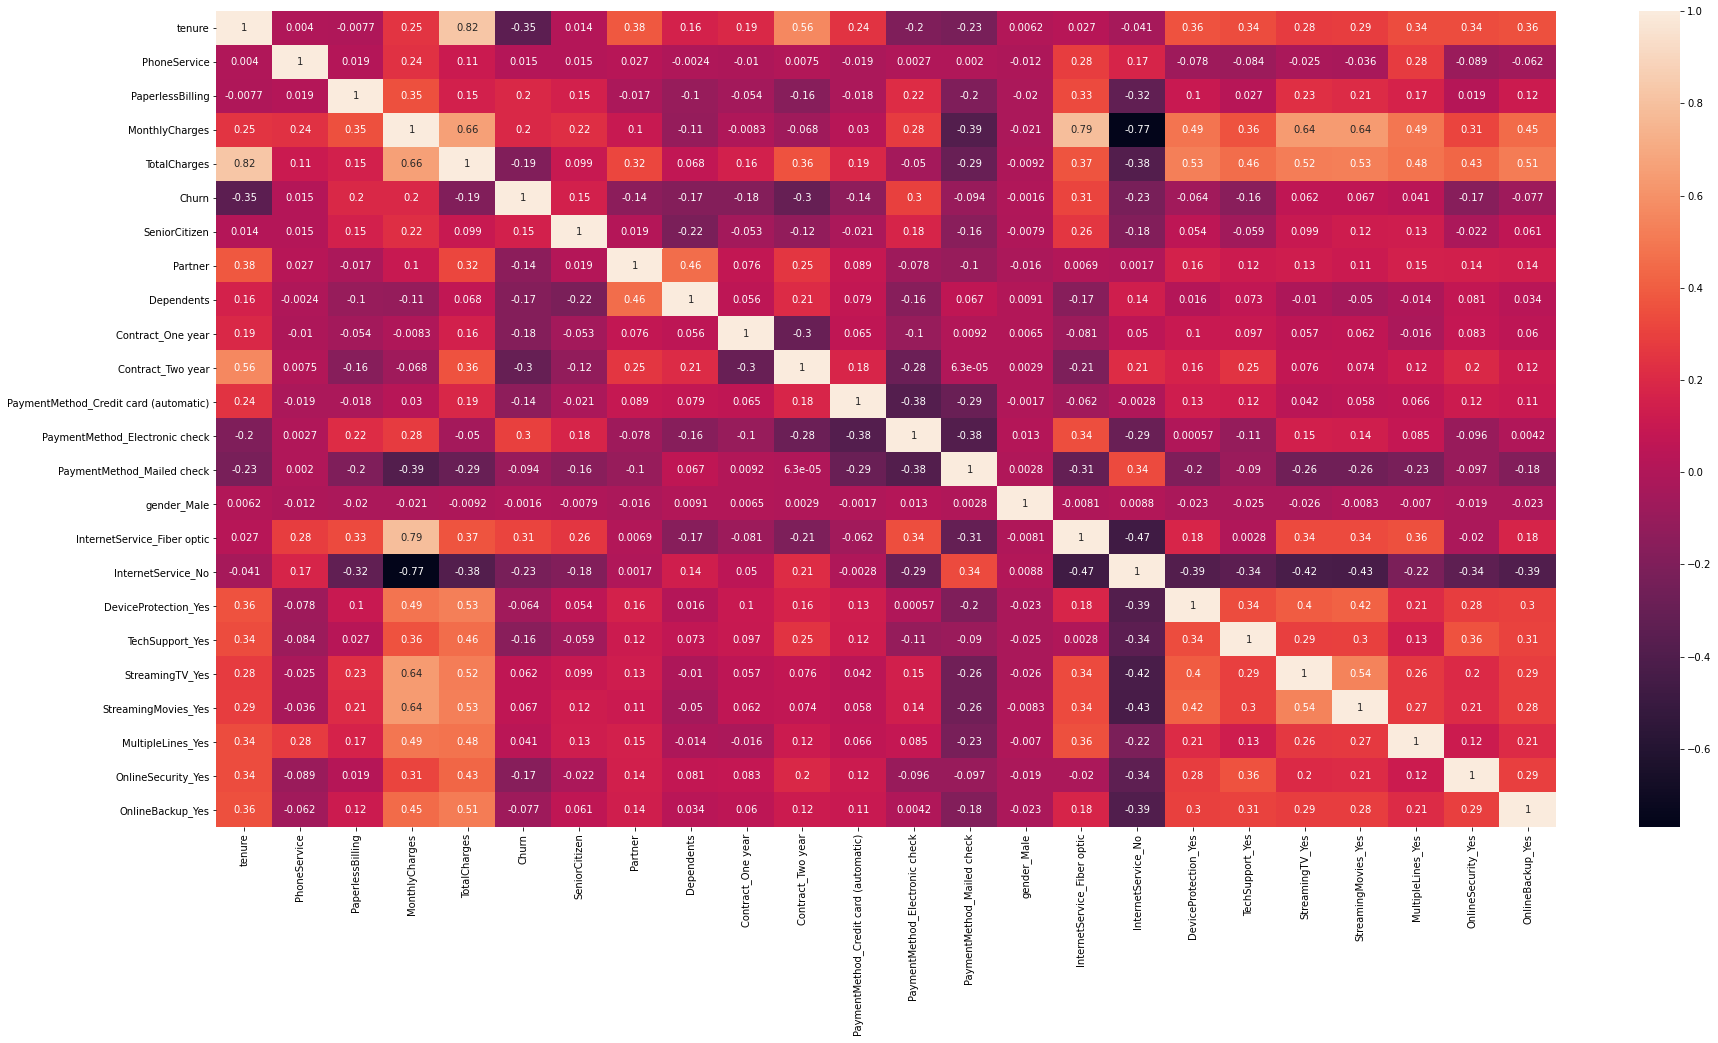

In [339]:
#Checking correlation matrix again:
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df_train.corr(),annot = True)
plt.show()

We can see that inter-correlated variables aren't explicitly visible from the heatmap anymore.

In [340]:
y_train = df_train.pop('Churn')
X_train = df_train

In [442]:
y_test = df_test.pop('Churn')
X_test = df_test

In [341]:
X_train.shape

(4929, 23)

In [342]:
y_train.shape

(4929,)

# CREATING THE MODEL

In [343]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(solver='liblinear', random_state=42)
# rfe = RFE(logreg, 13)            
# rfe = rfe.fit(X_train, y_train)

In [443]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [354]:
y_pred_train = logreg.predict(X_train)
np.unique(y_pred_train)

array([0, 1], dtype=int64)

In [355]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8062


In [445]:
y_pred_test = logreg.predict(X_test)

In [446]:
np.unique(y_pred_test)

array([0, 1], dtype=int64)

In [447]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8041


The accuracy is 0.8041. Let us see other parameters of efficiency

In [359]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4929
Model:                            GLM   Df Residuals:                     4905
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.0
Date:                Wed, 07 Jul 2021   Deviance:                       4068.0
Time:                        15:57:53   Pearson chi2:                 5.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6066      1.503     -1.069      0.285      -4.553       1.340
tenure                                   -1.4716      0.181     -8.151      0.000      -1.825      -1.118
PhoneService                             -0.3810      0.770     -0.495      0.621      -1.891       1.129
PaperlessBilling                          0.3449      0.089      3.877      0.000       0.171       0.519
MonthlyCharges                           -0.4259      1.145     -0.372      0.710      -2.670       1.818
TotalCharges                              0.7673      0.190      4.046      0.000       0.396       1.139
SeniorCitizen                             0.1728      0.102      1.700      0.089      -0.026       0.372
Partner                                   0.0597      0.093      0.640      0.522      -0.123       0.243
Dependents                               -0.2590      0.107     -2.415      0.016      -0.469      -0.049
Contract_One year                        -0.6905      0.128     -5.390      0.000      -0.942      -0.439
Contract_Two year                        -1.4058      0.208     -6.770      0.000      -1.813      -0.999
PaymentMethod_Credit card (automatic)    -0.0756      0.136     -0.556      0.578      -0.342       0.191
PaymentMethod_Electronic check            0.2934      0.112      2.622      0.009       0.074       0.513
PaymentMethod_Mailed check               -0.0239      0.138     -0.174      0.862      -0.294       0.246
gender_Male                               0.0195      0.078      0.251      0.802      -0.133       0.172
InternetService_Fiber optic               1.0930      0.949      1.152      0.249      -0.766       2.952
InternetService_No                       -1.0597      0.957     -1.107      0.268      -2.935       0.816
DeviceProtection_Yes                      0.0044      0.210      0.021      0.983      -0.408       0.416
TechSupport_Yes                          -0.2900      0.214     -1.355      0.175      -0.709       0.129
StreamingTV_Yes                           0.3010      0.388      0.776      0.438      -0.459       1.062
StreamingMovies_Yes                       0.3497      0.389      0.899      0.368      -0.412       1.112
MultipleLines_Yes                         0.3607      0.210      1.717      0.086      -0.051       0.772
OnlineSecurity_Yes                       -0.3500      0.213     -1.642      0.101      -0.768       0.068
OnlineBackup_Yes                         -0.1240      0.210     -0.591      0.554      -0.535       0.287
=========================================================================================================
"""

In [360]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [361]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes'],
      dtype='object')

In [362]:
X_train.columns[~rfe.support_]

Index(['SeniorCitizen', 'Partner', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'gender_Male', 'DeviceProtection_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [363]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4929
Model:                            GLM   Df Residuals:                     4913
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2037.5
Date:                Wed, 07 Jul 2021   Deviance:                       4074.9
Time:                        16:00:23   Pearson chi2:                 5.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.4658      0.228     -2.039      0.041      -0.914      -0.018
tenure                            -1.4500      0.177     -8.188      0.000      -1.797      -1.103
PhoneService                      -0.9564      0.181     -5.287      0.000      -1.311      -0.602
PaperlessBilling                   0.3533      0.089      3.989      0.000       0.180       0.527
MonthlyCharges                     0.4383      0.166      2.640      0.008       0.113       0.764
TotalCharges                       0.7575      0.188      4.029      0.000       0.389       1.126
Dependents                        -0.2618      0.096     -2.734      0.006      -0.449      -0.074
Contract_One year                 -0.7144      0.128     -5.597      0.000      -0.965      -0.464
Contract_Two year                 -1.4411      0.207     -6.957      0.000      -1.847      -1.035
PaymentMethod_Electronic check     0.3444      0.083      4.158      0.000       0.182       0.507
InternetService_Fiber optic        0.4107      0.181      2.271      0.023       0.056       0.765
InternetService_No                -0.3406      0.224     -1.518      0.129      -0.780       0.099
TechSupport_Yes                   -0.4492      0.108     -4.150      0.000      -0.661      -0.237
MultipleLines_Yes                  0.2302      0.099      2.322      0.020       0.036       0.425
OnlineSecurity_Yes                -0.4901      0.104     -4.709      0.000      -0.694      -0.286
OnlineBackup_Yes                  -0.2714      0.095     -2.862      0.004      -0.457      -0.086
==================================================================================================
"""

In [364]:
y_train_pred = res.predict(X_train_sm)

In [367]:
y_train_pred = y_train_pred.values.reshape(-1)

In [368]:
y_train_pred

array([0.74059489, 0.03808507, 0.32711699, ..., 0.19855521, 0.78161324,
       0.03420664])

In [369]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.740595,1095
1,0,0.038085,6928
2,0,0.327117,3664
3,1,0.650312,2900
4,0,0.610243,1630


In [370]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.740595,1095,1
1,0,0.038085,6928,0
2,0,0.327117,3664,0
3,1,0.650312,2900,1
4,0,0.610243,1630,1


In [372]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_final['predicted'])))

Model accuracy score: 0.8038


In [379]:
# Confusion matrix 
from sklearn import metrics

In [380]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3258  377]
 [ 590  704]]


Checking VIF values:

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [382]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,MonthlyCharges,11.92
4,TotalCharges,10.58
1,PhoneService,9.10
0,tenure,6.81
9,InternetService_Fiber optic,6.38
10,InternetService_No,6.22
7,Contract_Two year,3.25
2,PaperlessBilling,2.67
12,MultipleLines_Yes,2.64
11,TechSupport_Yes,2.08


In [385]:
col = col.drop(['PhoneService', 'MonthlyCharges'], 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes', 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes'],
      dtype='object')

In [386]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4929
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.3
Date:                Wed, 07 Jul 2021   Deviance:                       4102.7
Time:                        16:09:15   Pearson chi2:                 5.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3752      0.131    -10.514      0.000      -1.632      -1.119
tenure                            -1.4349      0.169     -8.470      0.000      -1.767      -1.103
PaperlessBilling                   0.3810      0.088      4.334      0.000       0.209       0.553
TotalCharges                       0.8234      0.173      4.770      0.000       0.485       1.162
Dependents                        -0.2680      0.095     -2.813      0.005      -0.455      -0.081
Contract_One year                 -0.6793      0.126     -5.376      0.000      -0.927      -0.432
Contract_Two year                 -1.4081      0.207     -6.798      0.000      -1.814      -1.002
PaymentMethod_Electronic check     0.3838      0.082      4.678      0.000       0.223       0.545
InternetService_Fiber optic        0.6117      0.109      5.622      0.000       0.398       0.825
InternetService_No                -0.9705      0.151     -6.434      0.000      -1.266      -0.675
TechSupport_Yes                   -0.3625      0.102     -3.548      0.000      -0.563      -0.162
MultipleLines_Yes                  0.2330      0.093      2.510      0.012       0.051       0.415
OnlineSecurity_Yes                -0.4458      0.101     -4.399      0.000      -0.644      -0.247
OnlineBackup_Yes                  -0.1924      0.092     -2.097      0.036      -0.372      -0.013
==================================================================================================
"""

In [387]:
y_pred_train = res.predict(X_train_sm).values.reshape(-1)

In [389]:
y_train_pred_final['Churn_Prob'] = y_pred_train

In [390]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.740692,1095,1
1,0,0.052117,6928,0
2,0,0.391839,3664,0
3,1,0.685134,2900,1
4,0,0.586263,1630,1


In [391]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_final['predicted'])))

Model accuracy score: 0.8022


In [392]:
#Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.12
0,tenure,6.08
5,Contract_Two year,3.09
7,InternetService_Fiber optic,3.06
1,PaperlessBilling,2.47
8,InternetService_No,2.43
10,MultipleLines_Yes,2.27
12,OnlineBackup_Yes,1.99
9,TechSupport_Yes,1.98
6,PaymentMethod_Electronic check,1.82


In [395]:
col = col.drop('TotalCharges')

In [396]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4929
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2063.5
Date:                Wed, 07 Jul 2021   Deviance:                       4127.1
Time:                        16:12:08   Pearson chi2:                 4.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4656      0.128    -11.477      0.000      -1.716      -1.215
tenure                            -0.7098      0.064    -11.076      0.000      -0.835      -0.584
PaperlessBilling                   0.3841      0.088      4.386      0.000       0.212       0.556
Dependents                        -0.2830      0.095     -2.975      0.003      -0.469      -0.097
Contract_One year                 -0.6511      0.125     -5.208      0.000      -0.896      -0.406
Contract_Two year                 -1.3461      0.204     -6.585      0.000      -1.747      -0.945
PaymentMethod_Electronic check     0.3879      0.082      4.721      0.000       0.227       0.549
InternetService_Fiber optic        0.8565      0.096      8.936      0.000       0.669       1.044
InternetService_No                -1.0192      0.150     -6.807      0.000      -1.313      -0.726
TechSupport_Yes                   -0.2720      0.101     -2.704      0.007      -0.469      -0.075
MultipleLines_Yes                  0.3072      0.091      3.378      0.001       0.129       0.486
OnlineSecurity_Yes                -0.3939      0.101     -3.906      0.000      -0.592      -0.196
OnlineBackup_Yes                  -0.1211      0.091     -1.337      0.181      -0.299       0.056
==================================================================================================
"""

In [397]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [398]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [399]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.746035,1095,1
1,0,0.070528,6928,0
2,0,0.371595,3664,0
3,1,0.688811,2900,1
4,0,0.548779,1630,1


In [400]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_final['predicted'])))

Model accuracy score: 0.7994


In [401]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,3.04
6,InternetService_Fiber optic,2.57
1,PaperlessBilling,2.43
9,MultipleLines_Yes,2.23
7,InternetService_No,1.99
11,OnlineBackup_Yes,1.96
8,TechSupport_Yes,1.93
0,tenure,1.89
3,Contract_One year,1.80
10,OnlineSecurity_Yes,1.78


Now the VIFs are all below 5. We can continue using this model

In [402]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3268,  367],
       [ 622,  672]], dtype=int64)

In [403]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_final['predicted'])))

Model accuracy score: 0.7994


In [404]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [405]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5193199381761978

In [406]:
# Let us calculate specificity
TN / float(TN+FP)

0.8990371389270977

In [407]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10096286107290234


In [408]:
# positive predictive value 
print (TP / float(TP+FP))

0.6467757459095284


In [409]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8401028277634961


In [413]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [414]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

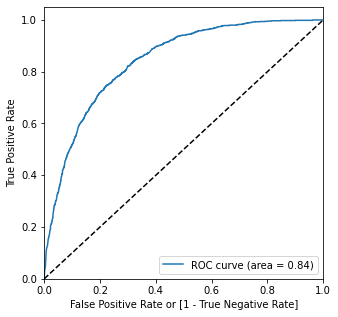

In [415]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [416]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.746035,1095,1,1,1,1,1,1,1,1,1,0,0
1,0,0.070528,6928,0,1,0,0,0,0,0,0,0,0,0
2,0,0.371595,3664,0,1,1,1,1,0,0,0,0,0,0
3,1,0.688811,2900,1,1,1,1,1,1,1,1,0,0,0
4,0,0.548779,1630,1,1,1,1,1,1,1,0,0,0,0


In [417]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.262528  1.000000  0.000000
0.1   0.1  0.605397  0.943586  0.485007
0.2   0.2  0.713938  0.850850  0.665199
0.3   0.3  0.762021  0.754250  0.764787
0.4   0.4  0.790627  0.656878  0.838239
0.5   0.5  0.799351  0.519320  0.899037
0.6   0.6  0.793061  0.376352  0.941403
0.7   0.7  0.771353  0.187017  0.979367
0.8   0.8  0.737472  0.000000  1.000000
0.9   0.9  0.737472  0.000000  1.000000


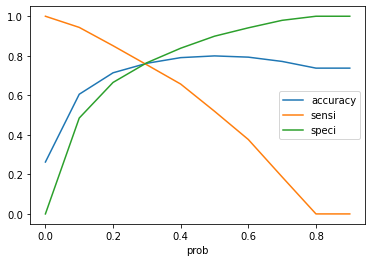

In [418]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Therefore 0.3 is the optimal cutoff

In [419]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.746035,1095,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.070528,6928,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.371595,3664,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.688811,2900,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.548779,1630,1,1,1,1,1,1,1,0,0,0,0,1


In [420]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_final['final_predicted'])))

Model accuracy score: 0.7620


In [421]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2780,  855],
       [ 318,  976]], dtype=int64)

In [422]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [423]:
 #Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7542503863987635

In [424]:
# Let us calculate specificity
TN / float(TN+FP)

0.7647867950481431

In [425]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23521320495185694


In [429]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.6467757459095284

In [427]:
Recall = TP / float(TP+FN)
Recall

0.7542503863987635

Testing on Test set now

In [430]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes
1741,16,1,0,0,0,0,0,0,0,1,0,1
457,30,0,1,0,1,0,0,0,1,0,0,1
177,7,0,0,0,0,0,1,0,0,0,1,0
4882,66,1,0,0,1,0,0,0,1,0,1,1
3612,21,1,0,0,0,1,1,0,0,1,0,0


In [431]:
X_test_sm = sm.add_constant(X_test)

In [432]:
y_test_pred = res.predict(X_test_sm)

In [439]:
y_test_pred

1741    4.775677e-06
457     1.728189e-11
177     2.543797e-03
4882    1.815664e-22
3612    5.380038e-07
            ...     
5516    1.802977e-02
3494    1.373701e-03
3641    5.285081e-17
6704    3.621083e-19
1695    4.073912e-18
Length: 2113, dtype: float64

In [433]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [434]:
y_test_df = pd.DataFrame(y_test)

In [435]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [436]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [437]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [438]:
y_pred_final.head()

,Churn,CustID,0
0,0,1741,4.775677e-06
1,0,457,1.728189e-11
2,1,177,2.543797e-03
3,0,4882,1.815664e-22
4,0,3612,5.380038e-07
